In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
advertising=pd.read_csv('advertising.csv')

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#we draw a pairplot two see the realtion between every 2 pairs

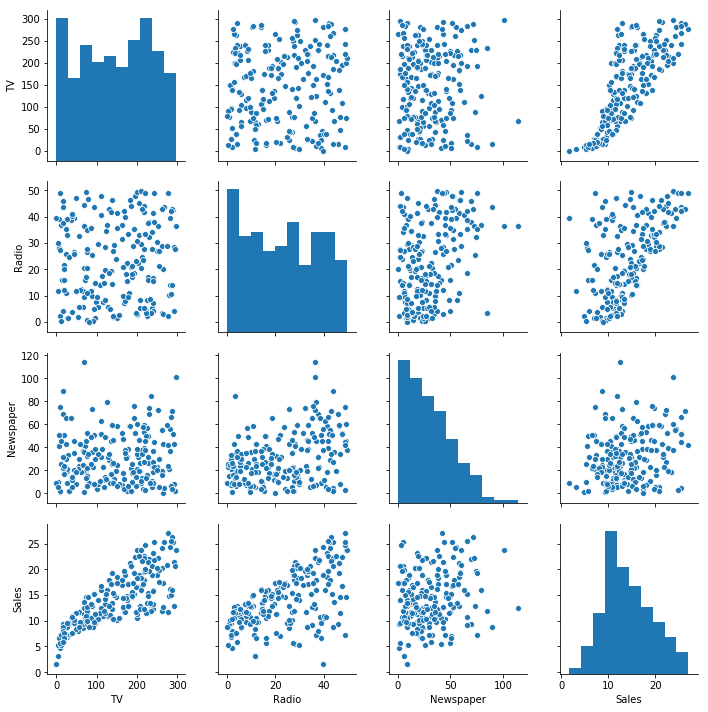

In [5]:
sns.pairplot(advertising)

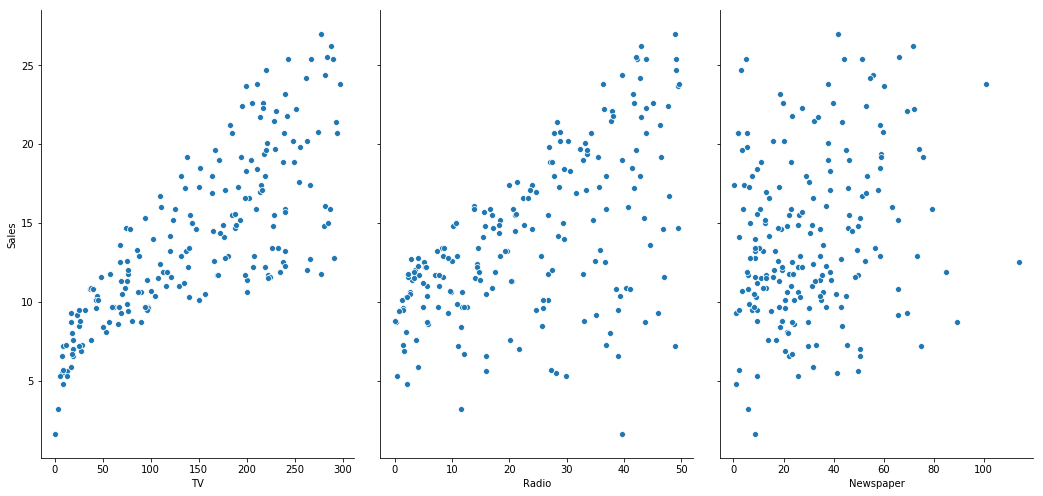

In [7]:
sns.pairplot(advertising, x_vars=['TV','Radio', 'Newspaper'], y_vars=['Sales'], height=7, aspect=0.7, kind='scatter')

In [8]:
x=advertising[['TV', 'Radio', 'Newspaper']]
y=advertising['Sales']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.7, random_state=100)

/home/ritul/anaconda_again/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(lr.intercept_)

2.652789668879496


In [13]:
coeff=pd.DataFrame(lr.coef_, x_test.columns, columns=['coefficient'])

In [14]:
coeff

,coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [15]:
import statsmodels.api as sm
x_train_sm=x_train
x_train_sm=sm.add_constant(x_train_sm)
lm=sm.OLS(y_train, x_train_sm).fit()
lm.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [16]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           9.97e-66
Time:                        20:10:39   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

In [17]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

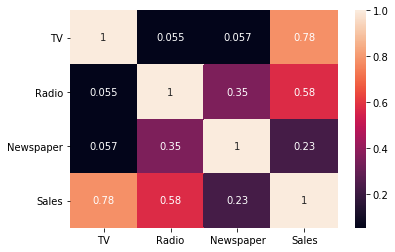

In [18]:
sns.heatmap(advertising.corr(), annot=True)

In [20]:
#from the above analysis we can easily see that newspaper does not affect sales significantly so we will create another model ignoring the newspaper column

In [21]:
x_train_new=x_train[['TV','Radio']]

In [22]:
x_test_new=x_test[['TV','Radio']]

In [30]:
lr.fit(x_train_new, y_train)
y_pred=lr.predict(x_test_new)

In [24]:
print(lr.intercept_)

2.7190400406029234


In [25]:
coef=pd.DataFrame(lr.coef_, x_test_new.columns, columns=['coefficients'])

In [26]:
coef

,coefficients
TV,0.045533
Radio,0.192488


In [27]:
x_train_2= x_train_new
x_train_2= sm.add_constant(x_train_2)
lm_1= sm.OLS(y_train, x_train_2).fit()
lm_1.params

const    2.719040
TV       0.045533
Radio    0.192488
dtype: float64

In [28]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           4.46e-67
Time:                        20:16:21   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

Text(0,0.5,'Sales')

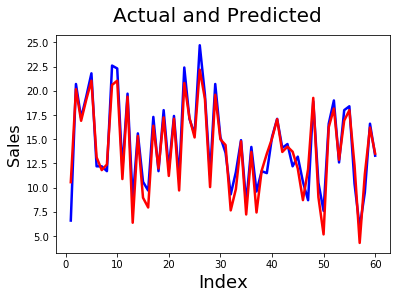

In [31]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16) 

Text(0,0.5,'ytest-ypred')

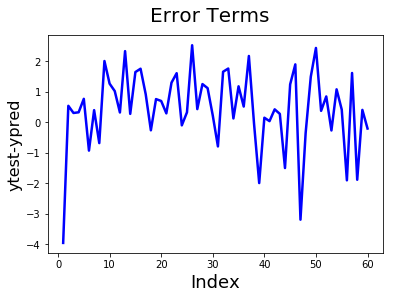

In [32]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label